170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Форма навчальних даних: (50000, 32, 32, 3)
Форма тестових даних: (10000, 32, 32, 3)
Тип даних зображень: uint8
Мінімальне значення пікселя після нормалізації: 0.0
Максимальне значення пікселя після нормалізації: 1.0


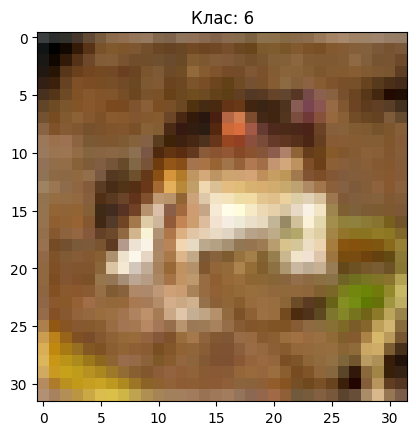

In [ ]:
import tensorflow as tf

# Набір даних CIFAR-10 через модуль keras усередині TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 3. Базова інформація
print("Форма навчальних даних:", x_train.shape)
print("Форма тестових даних:", x_test.shape)
print("Тип даних зображень:", x_train.dtype)

# 4. Нормалізація даних
# Пікселі отримують значення від 0 до 255, тому ділимо на 255 для масштабування до [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 5. Результат нормалізації
print("Мінімальне значення пікселя після нормалізації:", x_train.min())
print("Максимальне значення пікселя після нормалізації:", x_train.max())

# 6. Приклад однієї картинки
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(f"Клас: {y_train[0][0]}")
plt.show()

In [1]:
import tensorflow as tf

# 1. Визначення вхідного шару
# Створюємо вхідний тензор, який задає форму (32, 32, 3)
input_tensor = tf.keras.Input(shape=(32, 32, 3), name='input_layer')

# 2. Згорткова База (Feature Extractor)

# Блок 1
# Перший Conv2D
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv_1')(input_tensor)
# Перший MaxPooling
x = tf.keras.layers.MaxPooling2D((2, 2), name='pool_1')(x)

# Блок 2
# Другий Conv2D
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv_2')(x)
# Другий MaxPooling
x = tf.keras.layers.MaxPooling2D((2, 2), name='pool_2')(x)

# Блок 3
# Третій Conv2D
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv_3')(x)


# 3. (Classification Head)

# Перетворення 2D карти ознак у 1D вектор
x = tf.keras.layers.Flatten(name='flatten_layer')(x)

# Повнозв’язний шар
x = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(x)

# Вихідний шар для 10 класів
output_tensor = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 4. Створення та Компіляція Моделі
# Модель визначається, вказуючи, де починається (inputs) і де закінчується (outputs) потік даних.
model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor, name='CIFAR10_Functional_CNN')

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Огляд моделі
model.summary()

Model: "CIFAR10_Functional_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_layer (Flatten)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Завантажуємо дані
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Для швидкого запуску беремо частину даних
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

x_test_small = x_test[:2000]
y_test_small = y_test[:2000]

# 2. Нормалізація пікселів
x_train_small = x_train_small.astype('float32') / 255.0
x_test_small = x_test_small.astype('float32') / 255.0

# 3. Створюємо CNN модель
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. Компіляція моделі
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Вивід інформації про модель
model.summary()

# 6. Навчання моделі
history = model.fit(
    x_train_small, y_train_small,
    epochs=5,             # Для швидкого запуску
    batch_size=32,        # Менше пам'яті
    validation_split=0.2,
    verbose=2
)

# 7. Оцінка точності
test_loss, test_acc = model.evaluate(x_test_small, y_test_small, verbose=2)
print(f"Точність на тестових даних: {test_acc:.4f}")

# 8. Графік точності та втрат
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність навчання')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати навчання')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()

plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 - 13s - 51ms/step - accuracy: 0.2579 - loss: 1.9788 - val_accuracy: 0.3445 - val_loss: 1.7434
Epoch 2/5
250/250 - 24s - 96ms/step - accuracy: 0.3839 - loss: 1.6613 - val_accuracy: 0.3650 - val_loss: 1.7321
Epoch 3/5
250/250 - 10s - 40ms/step - accuracy: 0.4575 - loss: 1.4893 - val_accuracy: 0.4620 - val_loss: 1.4694
Epoch 4/5


KeyboardInterrupt: 

In [ ]:
# Імпорт бібліотек
# (np) — для роботи з масивами та швидких математичних операцій
# confusion_matrix з sklearn.metrics — для обчислення матриці помилок (confusion matrix),яка показує, скільки разів модель правильно класифікувала кожен клас і скільки разів переплутала класи
# ConfusionMatrixDisplay з sklearn.metrics — для наочного відображення матриці помилок у вигляді кольорової таблиці
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Прогнози на тестових даних
y_pred_probs = model.predict(x_test_small)           # ймовірності для 10 класів
y_pred = np.argmax(y_pred_probs, axis=1)            # обираємо клас з найвищою ймовірністю
y_true = y_test_small.flatten()                      # справжні мітки

# 2. Матриця помилок
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Матриця помилок")
plt.show()

# 3. Приклади правильних та неправильних прогнозів
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Випадкові 5 правильних прогнозів
correct_indices = np.where(y_pred == y_true)[0]
print("Приклади правильних прогнозів:")
for i in np.random.choice(correct_indices, 5, replace=False):
    plt.imshow(x_test_small[i])
    plt.title(f"Прогноз: {classes[y_pred[i]]}, Правда: {classes[y_true[i]]}")
    plt.axis('off')
    plt.show()

# Випадкові 5 неправильних прогнозів
incorrect_indices = np.where(y_pred != y_true)[0]
print("Приклади неправильних прогнозів:")
for i in np.random.choice(incorrect_indices, 5, replace=False):
    plt.imshow(x_test_small[i])
    plt.title(f"Прогноз: {classes[y_pred[i]]}, Правда: {classes[y_true[i]]}")
    plt.axis('off')
    plt.show()